# Support Vector Machine (SVM)

### A Support Vector Machine (SVM) is a powerful and versatile Machine Learning model, capable of performing linear or nonlinear classification, regression, and even outlier detection. We will discuss core concepts of SVMs, how to use them, and how they work. 

### An SVM classifier builds a model that assigns new data points to one of the given categories. Thus, it can be viewed as a non-probabilistic binary linear classifier. SVMs can be used for linear classification purposes. In addition to performing linear classification, SVMs can efficiently perform a non-linear classification using the kernel trick. It enable us to implicitly map the inputs into high dimensional feature spaces.

## Support Vector Machines intuition 

### Hyperplane

A hyperplane is a decision boundary which separates between given set of data points having different class labels. The SVM classifier separates data points using a hyperplane with the maximum amount of margin. This hyperplane is known as the maximum margin hyperplane and the linear classifier it defines is known as the maximum margin classifier.

### Support Vectors

Support vectors are the sample data points, which are closest to the hyperplane. These data points will define the separating line or hyperplane better by calculating margins.

### Margin

A margin is a separation gap between the two lines on the closest data points. It is calculated as the perpendicular distance from the line to support vectors or closest data points. In SVMs, we try to maximize this separation gap so that we get maximum margin.

The following diagram illustrates these concepts visually. 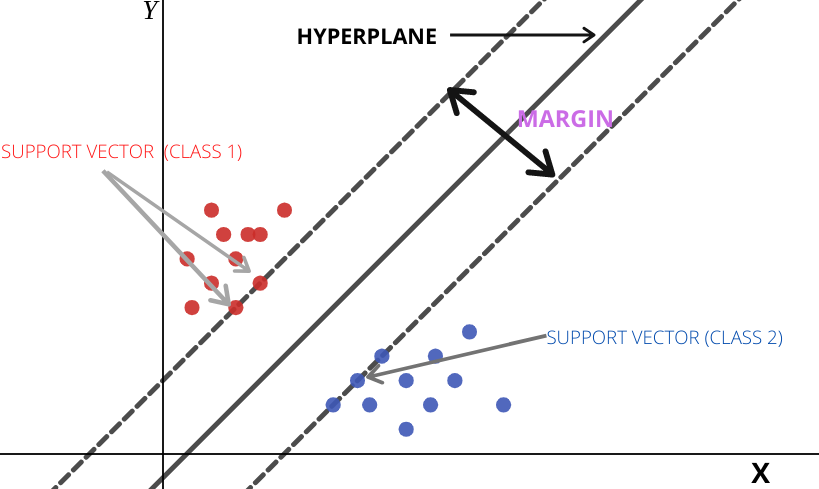







### SVM Under the hood

In SVMs, our main objective is to select a hyperplane with the maximum possible margin between support vectors in the given dataset. SVM searches for the maximum margin hyperplane in the following 2 step process –

1. Generate hyperplanes which segregates the classes in the best possible way. There are many hyperplanes that might classify the data. We should look for the best hyperplane that represents the largest separation, or margin, between the two classes.

2. So, we choose the hyperplane so that distance from it to the support vectors on each side is maximized. If such a hyperplane exists, it is known as the maximum margin hyperplane and the linear classifier it defines is known as a maximum margin classifier.

The following diagram illustrates the concept of maximum margin and maximum margin hyperplane in a clear manner.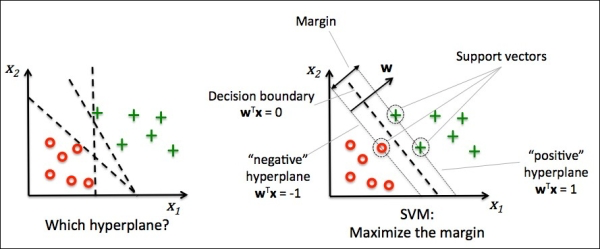



# Problem with dispersed datasets

Sometimes, the sample data points are so dispersed that it is not possible to separate them using a linear hyperplane. In such a situation, SVMs uses a kernel trick to transform the input space to a higher dimensional space as shown in the diagram below. It uses a mapping function to transform the 2-D input space into the 3-D input space. Now, we can easily segregate the data points using linear separation. 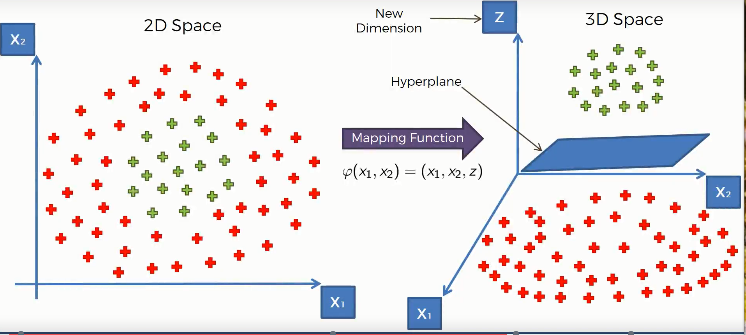

### Kernel trick 

### In practice, SVM algorithm is implemented using a kernel. It uses a technique called the kernel trick. In simple words, a kernel is just a function that maps the data to a higher dimension where data is separable. A kernel transforms a low-dimensional input data space into a higher dimensional space. So, it converts non-linear separable problems to linear separable problems by adding more dimensions to it. Thus, the kernel trick helps us to build a more accurate classifier. Hence, it is useful in non-linear separation problems.


We can define a kernel function as follows- 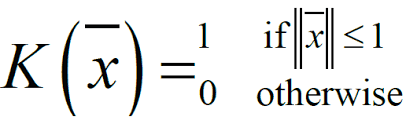 

In the context of SVMs, there are 4 popular kernels – Linear kernel,Polynomial kernel,Radial Basis Function (RBF) kernel (also called Gaussian kernel) and Sigmoid kernel. 



### Linear kernel
In linear kernel, the kernel function takes the form of a linear function as follows-

linear kernel : K(xi , xj ) = xiT xj

Linear kernel is used when the data is linearly separable. It means that data can be separated using a single line. It is one of the most common kernels to be used. It is mostly used when there are large number of features in a dataset. 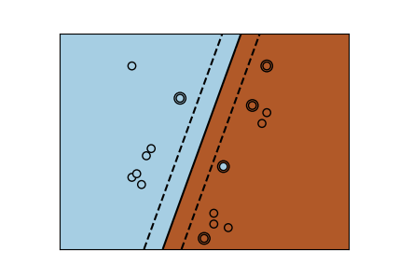

### Polynomial Kernel
Polynomial kernel represents the similarity of vectors (training samples) in a feature space over polynomials of the original variables. The polynomial kernel looks not only at the given features of input samples to determine their similarity, but also combinations of the input samples.

For degree-d polynomials, the polynomial kernel is defined as follows –

Polynomial kernel : K(xi , xj ) = (γxiT xj + r)d , γ > 0 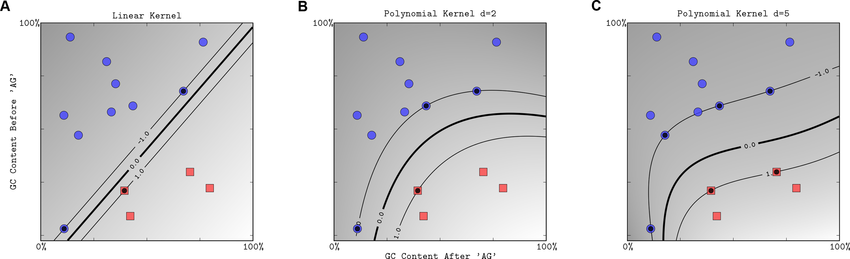

### Radial Basis Function Kernel

Radial basis function kernel is a general purpose kernel. It is used when we have no prior knowledge about the data. The RBF kernel on two samples x and y is defined by the following equation –

Radial Basis Function kernel: K(x,xi) = exp(-gamma * sum((x – xi^2))


### Sigmoid kernel
Sigmoid kernel has its origin in neural networks. We can use it as the proxy for neural networks. Sigmoid kernel is given by the following equation –

sigmoid kernel : k (x, y) = tanh(αxTy + c) 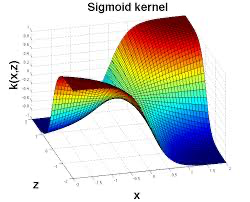

### SVMs are sensitive to the feature scales, as you can see in Figure in the left plot, the vertical scale is much larger than the horizontal scale, so the widest possible street is close to horizontal. After feature scaling (e.g., using Scikit-Learn’s StandardScaler()), the decision boundary in the right plot looks much better. 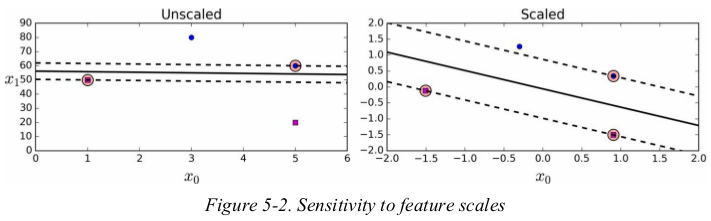



In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import psycopg2
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "svm"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
final_df = pd.read_csv('final_df.csv') 

In [3]:
final_df.shape

(34465, 96)

In [4]:
final_df.columns

Index(['hospital_expire_flag', 'LOS', 'blood', 'neoplasms', 'ICU', 'Neuro_ICU',
       'abnormalAbsolute Lymphocyte Count',
       'abnormalAbsolute Neutrophil Count', 'abnormalBasophils',
       'abnormalEosinophils', 'abnormalHematocrit', 'abnormalHemoglobin',
       'abnormalMCV', 'abnormalMonocytes', 'abnormalNeutrophils',
       'abnormalPlatelet Count', 'abnormalRBC', 'abnormalRDW', 'abnormalWBC',
       'normalAbsolute Lymphocyte Count', 'normalAbsolute Neutrophil Count',
       'normalBasophils', 'normalEosinophils', 'normalHematocrit',
       'normalHemoglobin', 'normalMCV', 'normalMonocytes', 'normalNeutrophils',
       'normalPlatelet Count', 'normalRBC', 'normalRDW', 'normalWBC',
       'abnormalAlanine Aminotransferase (ALT)', 'abnormalAlbumin',
       'abnormalAlkaline Phosphatase',
       'abnormalAsparate Aminotransferase (AST)', 'abnormalBilirubin, Total',
       'abnormalCreatine Kinase (CK)', 'abnormalGlobulin', 'abnormalPT',
       'abnormalPotassium', 'abnormalSodi

In [5]:
final_df['hospital_expire_flag'].value_counts()

0    30345
1     4120
Name: hospital_expire_flag, dtype: int64

In [6]:
final_df['hospital_expire_flag'].value_counts()/np.float(len(final_df))

0    0.880458
1    0.119542
Name: hospital_expire_flag, dtype: float64

In [7]:
final_df.isnull().sum()

hospital_expire_flag    0
LOS                     0
blood                   0
neoplasms               0
ICU                     0
                       ..
MAR_SINGLE              0
MAR_Unknown             0
MAR_WIDOWED             0
GEN_F                   0
GEN_M                   0
Length: 96, dtype: int64

In [8]:
X = final_df.drop(['hospital_expire_flag'], axis=1)

y = final_df['hospital_expire_flag']

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [10]:

X_train.shape, X_test.shape

((27572, 95), (6893, 95))

## Run SVM with default hyperparameters 

#### Default hyperparameter means C=1.0, kernel=rbf and gamma=auto among other parameters.

In [11]:
# import SVC classifier
from sklearn.svm import SVC


# import metrics to compute accuracy
from sklearn.metrics import accuracy_score


# instantiate classifier with default hyperparameters


rbf_kernel_svm_clf =  SVC()
    

# fit classifier to training set
rbf_kernel_svm_clf.fit(X_train,y_train)

# make predictions on test set
y_pred=rbf_kernel_svm_clf.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Model accuracy score with default hyperparameters: 0.8905


In [12]:
### Run SVM with rbf kernel and C=100.0

### We have seen that there are outliers in our dataset. So, we should increase the value of C as higher C means 
### fewer outliers. So, I will run SVM with kernel=rbf and C=100.0.

In [13]:
# instantiate classifier with rbf kernel and C=100
rbf_kernel_svm_clf100 = SVC(kernel="rbf", C= 100)
    


# fit classifier to training set
rbf_kernel_svm_clf100.fit(X_train,y_train)


# make predictions on test set
y_pred=rbf_kernel_svm_clf100.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=100.0 : 0.9058


In [ ]:
# Model accuracy score with rbf kernel and C=100.0 : 0.9058

In [14]:
# instantiate classifier with rbf kernel and C=1000
rbf_kernel_svm_clf100 = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", C= 1000))
    ])


# fit classifier to training set
rbf_kernel_svm_clf100.fit(X_train,y_train)


# make predictions on test set
y_pred=rbf_kernel_svm_clf100.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=100.0 : 0.8671


In [15]:
### In this case, we can see that the accuracy had decreased with C=1000.0

### Run SVM with linear kernel

In [16]:
from sklearn.pipeline import Pipeline

from sklearn.svm import LinearSVC

scaler = StandardScaler()
svm_clf1 = LinearSVC(C=1, loss="hinge", random_state=42)
svm_clf2 = LinearSVC(C=100, loss="hinge", random_state=42)

scaled_svm_clf1 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf1),
    ])
scaled_svm_clf2 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf2),
    ])

scaled_svm_clf1.fit(X_train,y_train)
scaled_svm_clf2.fit(X_train,y_train)

y_pred1 =svm_clf1.predict(X_test)
y_pred2 =svm_clf2.predict(X_test)

# compute and print accuracy score
print('Model accuracy score with linear kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred1)))

print('Model accuracy score with linear kernel and C=100 : {0:0.4f}'. format(accuracy_score(y_test, y_pred2)))

/home/jupyter-remerine/.local/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Model accuracy score with linear kernel and C=1.0 : 0.8812
Model accuracy score with linear kernel and C=100 : 0.8823


/home/jupyter-remerine/.local/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [17]:
# if your SVM model is overfitting, you can try regularizing it by reducing .

In [18]:
# Alternative way

# linear_svc=SVC(kernel='linear', C=1.0) 

# linear_svc.fit(X_train,y_train)
# y_pred_test=linear_svc.predict(X_test)

In [19]:
# linear_svc100=SVC(kernel='linear', C=100.0) 
# linear_svc100.fit(X_train, y_train)
# y_pred=linear_svc100.predict(X_test)

### Run SVM with polynomial kernel 

#### Run SVM with polynomial kernel and C=1.0

In [20]:
# instantiate classifier with polynomial kernel and C=1.0

poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=1))
    ])


# fit classifier to training set
poly_kernel_svm_clf.fit(X_train,y_train)


# make predictions on test set
y_pred=poly_kernel_svm_clf.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with polynomial kernel and C=1.0 : 0.8867


In [21]:
# Run SVM with polynomial kernel and C=100.0

# instantiate classifier with polynomial kernel and C=100.0
poly_kernel_svm_clf100 = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=100))
    ])


# fit classifier to training set
poly_kernel_svm_clf100.fit(X_train,y_train)


# make predictions on test set
y_pred=poly_kernel_svm_clf100.predict(X_test)



# compute and print accuracy score
print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with polynomial kernel and C=1.0 : 0.8757


### Run SVM with sigmoid kernel

In [22]:
# instantiate classifier with sigmoid kernel and C=1.0
sigmoid_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="sigmoid", C=1))
    ]) 


# fit classifier to training set
sigmoid_kernel_svm_clf.fit(X_train,y_train)


# make predictions on test set
y_pred=sigmoid_kernel_svm_clf.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with sigmoid kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with sigmoid kernel and C=1.0 : 0.8342
